<a href="https://colab.research.google.com/github/mohitsharmas97/Fraud_detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install gdown
!gdown --id 1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
From (redirected): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t&uuid=8df274b8-384a-46be-bd93-b026f66fe500
To: /content/Fraud.csv
100% 494M/494M [00:06<00:00, 70.5MB/s]


In [3]:
!wget "https://drive.usercontent.google.com/download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&authuser=0"


--2025-08-08 15:57:48--  https://drive.usercontent.google.com/download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&authuser=0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2468 (2.4K) [text/html]
Saving to: ‘download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&authuser=0’

download?id=1VNpyNk 100%[===================>]   2.41K  --.-KB/s    in 0s      

2025-08-08 15:57:48 (48.1 MB/s) - ‘download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&authuser=0’ saved [2468/2468]



In [4]:
dataset=pd.read_csv("Fraud.csv")
dataset.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset['isFraud'].count()

np.int64(6362620)

In [7]:
dataset.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
fraud_counts = dataset['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [9]:
fraud_counts = dataset['isFlaggedFraud'].value_counts()
print(fraud_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


/tmp/ipython-input-3747304162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='isFlaggedFraud', palette='Set2')


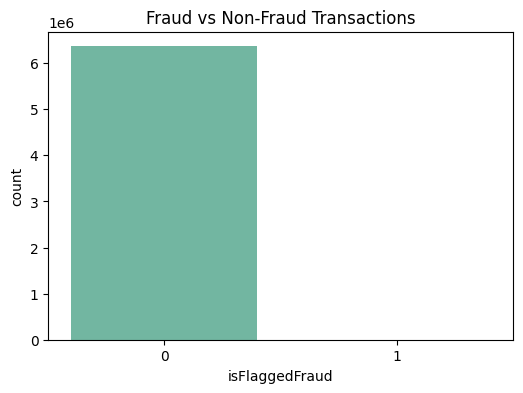

In [10]:
# 1. Fraud vs Non-Fraud count
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='isFlaggedFraud', palette='Set2')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

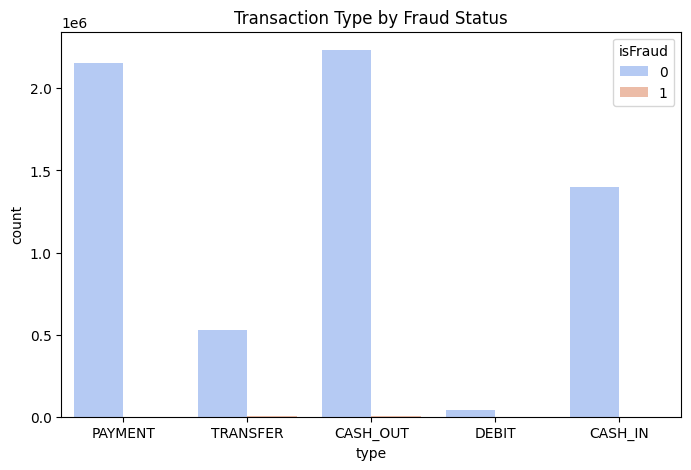

In [11]:
# 2. Transaction type distribution
plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x='type', hue='isFraud', palette='coolwarm')
plt.title("Transaction Type by Fraud Status")
plt.show()


In [12]:
fraud = dataset[dataset.isFraud == 1]
non_fraud = dataset[dataset.isFraud == 0]

# Manually sample from each group to achieve stratification
non_fraud_sampled = non_fraud.groupby('type').apply(lambda x: x.sample(n=min(len(x), 15000 // len(non_fraud['type'].unique())), random_state=42)).reset_index(drop=True)

df_balanced = pd.concat([fraud, non_fraud_sampled])

/tmp/ipython-input-804665668.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_fraud_sampled = non_fraud.groupby('type').apply(lambda x: x.sample(n=min(len(x), 15000 // len(non_fraud['type'].unique())), random_state=42)).reset_index(drop=True)


In [13]:
df_balanced.shape

(23213, 11)

In [14]:
fraud_counts = df_balanced['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    15000
1     8213
Name: count, dtype: int64


/tmp/ipython-input-2038316421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='isFraud', palette='Set2')


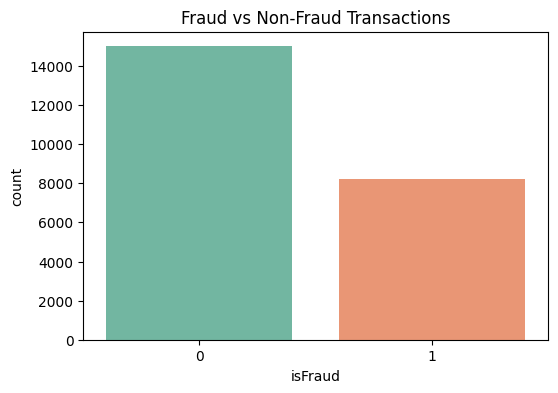

In [15]:
# 1. Fraud vs Non-Fraud count
plt.figure(figsize=(6,4))
sns.countplot(data=df_balanced, x='isFraud', palette='Set2')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

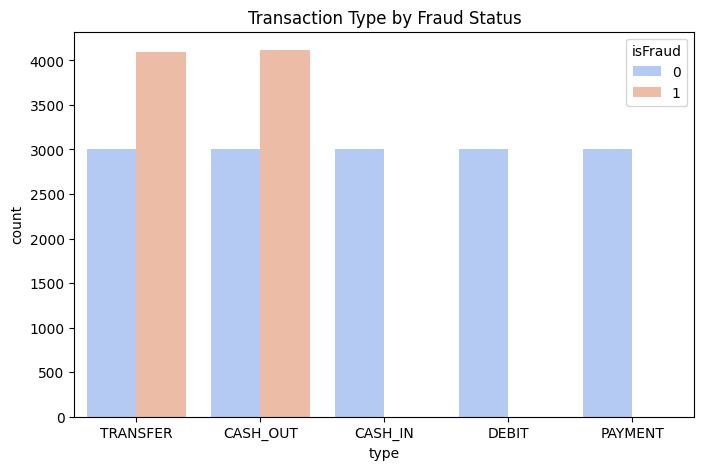

In [16]:
# 2. Transaction type distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df_balanced, x='type', hue='isFraud', palette='coolwarm')
plt.title("Transaction Type by Fraud Status")
plt.show()


In [17]:
categorical_cols = df_balanced.select_dtypes(include='object').columns
pd.get_dummies(df_balanced, columns=categorical_cols, drop_first=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,...,nameDest_M994077354,nameDest_M99427385,nameDest_M995111968,nameDest_M995558614,nameDest_M995697600,nameDest_M996294206,nameDest_M997080351,nameDest_M998473645,nameDest_M998866304,nameDest_M999384622
2,1,181.00,181.0,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,181.00,181.0,0.0,21182.00,0.00,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
251,1,2806.00,2806.0,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
252,1,2806.00,2806.0,0.0,26202.00,0.00,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
680,1,20128.00,20128.0,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,355,266394.13,10943.0,0.0,126496.27,392890.40,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
14996,228,64256.10,0.0,0.0,378676.49,442932.59,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
14997,403,797671.50,483.0,0.0,0.00,797671.50,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
14998,18,59447.90,0.0,0.0,4059585.12,4119033.01,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df_balanced.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0


In [20]:
df_balanced.shape

(23213, 11)

In [21]:
df_balanced.drop(['nameDest','nameOrig'], axis=1, inplace=True)


In [22]:
df_balanced.value_counts()

step  type      amount       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
617   CASH_OUT  10000000.00  10000000.00    0.00            0.00            10000000.00     1        0                 4
387   CASH_OUT  10000000.00  10000000.00    0.00            0.00            10000000.00     1        0                 4
646   CASH_OUT  10000000.00  10000000.00    0.00            0.00            10000000.00     1        0                 3
                0.00         0.00           0.00            0.00            0.00            1        0                 2
730   CASH_OUT  10000000.00  10000000.00    0.00            0.00            10000000.00     1        0                 2
                                                                                                                      ..
192   CASH_OUT  1764326.19   1764326.19     0.00            174021.75       1938347.94      1        0                 1
                1489970.00   1489970.00     0.00            6487649.30      7977619.30      1        0                 1
                585511.14    585511.14      0.00            67757.07        653268.21       1        0                 1
                306213.63    306213.63      0.00            1489690.35      1795903.98      1        0                 1
      PAYMENT   1111.84      24539.00       23427.16        0.00            0.00            0        0                 1
Name: count, Length: 23197, dtype: int64

In [29]:
# Apply one-hot encoding to the 'type' column
df_balanced= pd.get_dummies(df_balanced, columns=['type'], drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_balanced.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.0,181.0,0.0,0.0,0.0,1,0,False,False,False,True
3,1,181.0,181.0,0.0,21182.0,0.0,1,0,True,False,False,False
251,1,2806.0,2806.0,0.0,0.0,0.0,1,0,False,False,False,True
252,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,True,False,False,False
680,1,20128.0,20128.0,0.0,0.0,0.0,1,0,False,False,False,True


In [31]:
df_balanced.shape

(23213, 12)

In [32]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target variable if it's still in the DataFrame)
numerical_cols_encoded = df_balanced.select_dtypes(include=np.number).columns.tolist()

# Assuming 'isFraud' is the target variable and should not be scaled
if 'isFraud' in numerical_cols_encoded:
    numerical_cols_encoded.remove('isFraud')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical columns
df_balanced_scaled = df_balanced.copy()
df_balanced_scaled[numerical_cols_encoded] = scaler.fit_transform(df_balanced_scaled[numerical_cols_encoded])

display(df_balanced_scaled.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,-1.578038,-0.410312,-0.346970,-0.22413,-0.269196,-0.331605,1,-0.026263,False,False,False,True
3,-1.578038,-0.410312,-0.346970,-0.22413,-0.263957,-0.331605,1,-0.026263,True,False,False,False
251,-1.578038,-0.408727,-0.346129,-0.22413,-0.269196,-0.331605,1,-0.026263,False,False,False,True
252,-1.578038,-0.408727,-0.346129,-0.22413,-0.262716,-0.331605,1,-0.026263,True,False,False,False
680,-1.578038,-0.398268,-0.340579,-0.22413,-0.269196,-0.331605,1,-0.026263,False,False,False,True


In [33]:
X_scaled = df_balanced_scaled.drop('isFraud', axis=1)
Y_scaled = df_balanced_scaled['isFraud']

**Reasoning**:
Split the scaled data into training and testing sets and verify the stratification.



In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(
    X_scaled, Y_scaled, test_size=0.2, stratify=Y_scaled, random_state=42
)

print("Scaled Train class distribution:", Y_train_scaled.value_counts())
print("Scaled Test class distribution:", Y_test_scaled.value_counts())

Scaled Train class distribution: isFraud
0    12000
1     6570
Name: count, dtype: int64
Scaled Test class distribution: isFraud
0    3000
1    1643
Name: count, dtype: int64


In [35]:
from xgboost import XGBClassifier

# Initialize XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, Y_train_scaled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_scaled, y_pred)
precision = precision_score(Y_test_scaled, y_pred)
recall = recall_score(Y_test_scaled, y_pred)
f1 = f1_score(Y_test_scaled, y_pred)
conf_matrix = confusion_matrix(Y_test_scaled, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9946
Precision: 0.9921
Recall: 0.9927
F1-Score: 0.9924

Confusion Matrix:
[[2987   13]
 [  12 1631]]


In [38]:
import joblib

# Save the trained model to a file
joblib.dump(xgb_model, 'xgboost_model.joblib')

print("XGBoost model saved successfully as xgboost_model.joblib")

XGBoost model saved successfully as xgboost_model.joblib


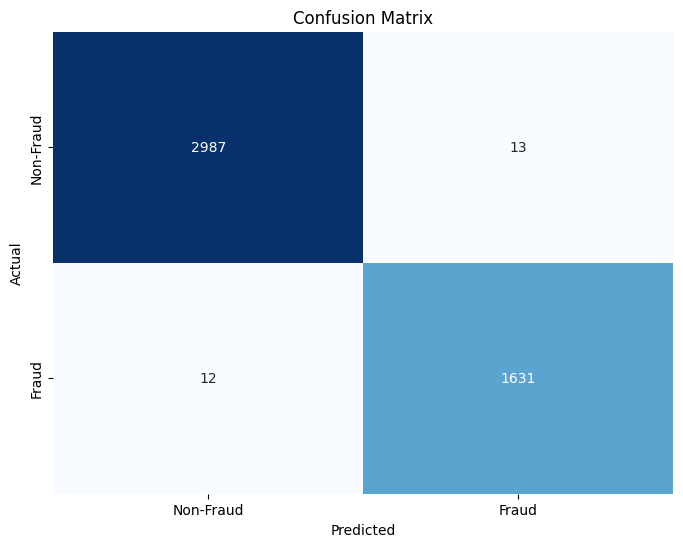


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.99      0.99      0.99      1643

    accuracy                           0.99      4643
   macro avg       0.99      0.99      0.99      4643
weighted avg       0.99      0.99      0.99      4643



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test_scaled, y_pred))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (assuming they are still 'object' type in X_scaled)
categorical_cols = X_scaled.select_dtypes(include='object').columns

# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply the preprocessing to the training and testing data
X_train_scaled_processed = preprocessor.fit_transform(X_train_scaled)
X_test_scaled_processed = preprocessor.transform(X_test_scaled)


# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled_processed, Y_train_scaled)

# Make predictions on the scaled test set
y_pred_lr = log_reg_model.predict(X_test_scaled_processed)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(Y_test_scaled, y_pred_lr)
precision_lr = precision_score(Y_test_scaled, y_pred_lr)
recall_lr = recall_score(Y_test_scaled, y_pred_lr)
f1_lr = f1_score(Y_test_scaled, y_pred_lr)
conf_matrix_lr = confusion_matrix(Y_test_scaled, y_pred_lr)

# Print the evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)

Logistic Regression Model Evaluation:
Accuracy: 0.9481
Precision: 0.9327
Recall: 0.9197
F1-Score: 0.9261

Confusion Matrix:
[[2891  109]
 [ 132 1511]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled_processed, Y_train_scaled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled_processed)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_test_scaled, y_pred_rf)
precision_rf = precision_score(Y_test_scaled, y_pred_rf)
recall_rf = recall_score(Y_test_scaled, y_pred_rf)
f1_rf = f1_score(Y_test_scaled, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test_scaled, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)

Random Forest Model Evaluation:
Accuracy: 0.9918
Precision: 0.9861
Recall: 0.9909
F1-Score: 0.9885

Confusion Matrix:
[[2977   23]
 [  15 1628]]


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled_processed, Y_train_scaled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled_processed)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(Y_test_scaled, y_pred_knn)
precision_knn = precision_score(Y_test_scaled, y_pred_knn)
recall_knn = recall_score(Y_test_scaled, y_pred_knn)
f1_knn = f1_score(Y_test_scaled, y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_test_scaled, y_pred_knn)

# Print the evaluation metrics
print("K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)

K-Nearest Neighbors Model Evaluation:
Accuracy: 0.9524
Precision: 0.9325
Recall: 0.9330
F1-Score: 0.9328

Confusion Matrix:
[[2889  111]
 [ 110 1533]]
